In [2]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit
from parallel_two_qubit_gate_decomposition import *
from gates_numpy import cnot_gate, fsim_gate, cphase_gate, xy_gate, get_gate_unitary_qiskit, iswap, fsim
from itertools import product
from qiskit.transpiler import PassManager
import sys
sys.path.append('../..')
from utils.riswap_gates.riswap import RiSwapGate
#test

In [3]:
import sys
sys.path.append('../..')
from utils.riswap_gates.riswap import RiSwapGate

In [4]:
# import h5py
# a = np.random.random(size=(100,20))
# with h5py.File('data.h5', 'r') as h5f:
#     h5f.create_dataset('dataset_2', data=a)

In [5]:
gate_error = h5f['gate_error'][:]
decomp_error = h5f['decomp_error'][:]
fidelity_error = h5f['fidelity_error'][:]

NameError: name 'h5f' is not defined

In [ ]:
import h5py
with h5py.File('data.h5','r') as hf:
    dataset_names = list(hf.keys())
print(dataset_names)

['dataset_0', 'dataset_1', 'dataset_2', 'decomp_error', 'fidelity_error', 'gate_error']


In [ ]:
with h5py.File('data.h5', 'r') as h5f:
    b= h5f['dataset_0'][:]
b

array([[0.64479311, 0.87094352, 0.69615261, ..., 0.74927332, 0.14344678,
        0.38203958],
       [0.36445602, 0.94846684, 0.58086926, ..., 0.02706108, 0.3151432 ,
        0.20591295],
       [0.65754104, 0.41376014, 0.75013606, ..., 0.92863342, 0.80493034,
        0.43288851],
       ...,
       [0.67307215, 0.92391674, 0.59389891, ..., 0.02892986, 0.24438165,
        0.44122936],
       [0.95215406, 0.5165512 , 0.3879898 , ..., 0.68689686, 0.70847102,
        0.80644862],
       [0.0818568 , 0.37530158, 0.83589134, ..., 0.58085867, 0.19617362,
        0.45649801]])

In [5]:
qc = QuantumCircuit(2)
from qiskit.quantum_info import random_unitary
qc.append(random_unitary(dims=(2,2)),[0,1])
qc.draw(output='mpl')

from qiskit.converters import circuit_to_dag, dag_to_circuit
dag = circuit_to_dag(qc)

In [12]:
n = 1
base_fidelity_list = [1-10e-3,1-5e-3, 1-10e-4]
alpha_range = np.linspace(1,8,8)
data = np.zeros((len(base_fidelity_list), len(alpha_range),n))
best_fid = np.zeros((len(base_fidelity_list), len(alpha_range),n))
for b_index, base_fidelity in enumerate(base_fidelity_list):
    for j in range(n):
        qc = QuantumCircuit(2)
        # qc.append(random_unitary(dims=(2,2)),[0,1])
        from qiskit.circuit.library.standard_gates import *
        qc.append(SwapGate(), [0,1])
        qc.draw(output='mpl')
        dag = circuit_to_dag(qc)
        for index, i in enumerate(alpha_range):
            alpha = 1/i
            fid_2q = {(0,1):[1-alpha*(1-base_fidelity)]}
            params = [[alpha]]
            gate_labels = [f'$iSwap^{alpha}$']
            gate_defs = [RiSwapGate]
        
            pgrp = ParallelGateReplacementPass(gate_defs, params ,fid_2q, fidelity_list_1q_gate=[1 for _ in range(54)], tol=1e-10)
            approx = pgrp.run(dag)
            # print(dag_to_circuit(approx).draw())
            print(alpha, len(approx.two_qubit_ops()))
            print(pgrp.property_set["best_fid"])
            data[b_index][index][j] = len(approx.two_qubit_ops())
            best_fid[b_index][index][j] = pgrp.property_set["best_fid"]

    with h5py.File('data.h5', 'w') as h5f:
        h5f.create_dataset('dataset_1', data=data)
        h5f.create_dataset('dataset_2', data=best_fid)

1.0 3
0.9702989998112884
0.5 3
0.9850748716820065
0.3333333333333333 5
0.9834440744224704


KeyboardInterrupt: 

NameError: name 'best_fid' is not defined

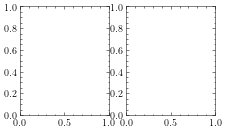

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import sem
plt.style.use(['science'])
fig, axs = plt.subplots(1, 2, figsize=(3.5,2))
# #plotting mean
# for i in range(len(base_fidelity_list)):
#     axs[0].errorbar(alpha_range, data[i].mean(axis=1), yerr=sem(data[i], axis=1), fmt='-o')
#     axs[1].errorbar(alpha_range, best_fid[i].mean(axis=1),yerr=sem(best_fid[i], axis=1), fmt='-o')
# axs[0].set_ylabel("Average Gate Count")
# axs[1].set_ylabel("Average Fidelity")
 
#plotting best
for i in range(len(base_fidelity_list)):
    index = np.argmax(best_fid[i], axis=1)
    axs[0].errorbar(alpha_range, [data[i][x][index[x]] for x in range(len(index))], fmt='-o')
    axs[1].errorbar(alpha_range, best_fid[i].max(axis=1), fmt='-o')
axs[0].set_ylabel("Gate Count")
axs[1].set_ylabel("Fidelity")

fig.suptitle(r"$iSwap^{1/\alpha}$' for SWAP")
axs[0].set_xlabel(r"$iSwap^{1/\alpha}$'")
axs[1].set_xlabel(r"$iSwap^{1/\alpha}$'")

plt.tight_layout()

In [11]:
base_fidelity = 1-5e-3
alpha_range = [2,3,5,7]
gate_range = range(2,9)
qc = QuantumCircuit(2)
from qiskit.circuit.library.standard_gates import SwapGate
qc.append(SwapGate(), [0,1])
dag = circuit_to_dag(qc)


In [9]:
import h5py
from qiskit import QuantumCircuit
import numpy as np
from parallel_two_qubit_gate_decomposition import *
import sys
sys.path.append('../..')
from utils.riswap_gates.riswap import RiSwapGate


base_fidelity_list = [1-10e-3,1-5e-3, 1-10e-4]
base_fidelity = base_fidelity_list[1]
alpha_range = [2,3,5,7,11]
gate_range = range(2,9)
qc = QuantumCircuit(2)
from qiskit.circuit.library.standard_gates import SwapGate
qc.append(SwapGate(), [0,1])
dag = circuit_to_dag(qc)

N=1

#load in previous data
with h5py.File('data.h5', 'r') as h5f:
    gate_error = h5f['gate_error'][:]
    decomp_error = h5f['decomp_error'][:]
    fidelity_error = h5f['fidelity_error'][:]

#XXX need some case where data doesn't already exist
#I need to figure out a better proramming pattern for this
gate_error = np.zeros(shape=(len(alpha_range), len(gate_range)))
decomp_error = np.zeros(shape=(len(alpha_range), len(gate_range)))
fidelity_error = np.zeros(shape=(len(alpha_range), len(gate_range)))

for n in range(N):

    # if len(gate_error[0][0]) >= n:
    #     break

    #new data for this iteration
    temp_gate_error = np.zeros(shape=(len(alpha_range), len(gate_range)))
    temp_decomp_error = np.zeros(shape=(len(alpha_range), len(gate_range)))
    temp_fidelity_error = np.zeros(shape=(len(alpha_range), len(gate_range)))

    for alpha_index, alpha in enumerate(alpha_range):
        alpha = 1/alpha
        for gate_index, gate_count in enumerate(gate_range):

            params = [[alpha]]
            gate_labels = [f'$iSwap^{alpha}$']
            gate_defs = [RiSwapGate]

            gate_error[alpha_index][gate_index] = ((1-(alpha*(1-base_fidelity)))**gate_count)

            #run perfect
            fid_2q = {(0,1):[1]}
            pgrp = ParallelGateReplacementPass(gate_defs, params ,fid_2q, fidelity_list_1q_gate=[1 for _ in range(54)], tol=1e-10, force_gate_count=gate_count)
            approx = pgrp.run(dag)
            decomp_error[alpha_index][gate_index] = (pgrp.property_set["best_fid"])

            #run noisy
            fid_2q = {(0,1):[1-alpha*(1-base_fidelity)]}
            pgrp = ParallelGateReplacementPass(gate_defs, params ,fid_2q, fidelity_list_1q_gate=[1 for _ in range(54)], tol=1e-10, force_gate_count=gate_count)
            approx = pgrp.run(dag)
            fidelity_error[alpha_index][gate_index] = (pgrp.property_set["best_fid"])

            # print(f"{gate_error[-1]}, {decomp_error[-1]}, {fidelity_error[-1]}")

    #update data
    np.append(gate_error, temp_gate_error)
    np.append(decomp_error, temp_decomp_error)
    np.append(fidelity_error, temp_fidelity_error)

#write back data
with h5py.File('data.h5', 'r+') as h5f:
    # delete old, differently sized dataset
    del h5f['gate_error'] 
    del h5f['decomp_error']
    del h5f['fidelity_error']
    h5f.create_dataset('gate_error', data=gate_error)
    h5f.create_dataset('decomp_error', data=decomp_error)
    h5f.create_dataset('fidelity_error', data=fidelity_error)

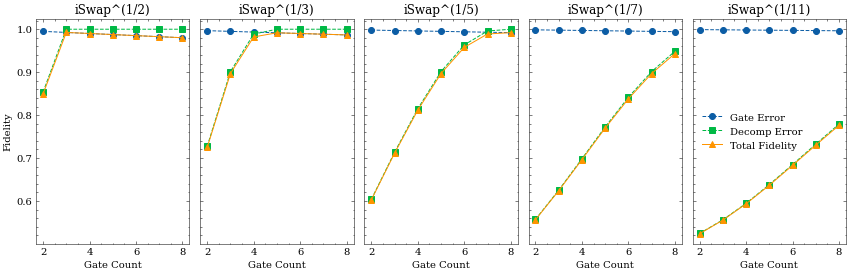

In [10]:
import h5py
with h5py.File('data.h5', 'r') as h5f:
    gate_error = h5f['gate_error'][:]
    decomp_error = h5f['decomp_error'][:]
    fidelity_error = h5f['fidelity_error'][:]

import matplotlib.pyplot as plt
plt.style.use(['science', 'no-latex'])
fig, axs = plt.subplots(1,len(gate_error), sharey=True, figsize=(12, 4))
for alpha in range(len(gate_error)):
    axs[alpha].plot(gate_range, gate_error[alpha], label="Gate Error", linestyle='--', marker='o')
    axs[alpha].plot(gate_range, decomp_error[alpha], label="Decomp Error", linestyle='--', marker='s')
    axs[alpha].plot(gate_range, fidelity_error[alpha], label="Total Fidelity", marker='^')
    axs[alpha].set_xlabel("Gate Count")
    axs[alpha].set_title(f"iSwap^(1/{alpha_range[alpha]})")
axs[-1].legend()
axs[0].set_ylabel("Fidelity")
fig.tight_layout()
fig.show()
filename = "nuop_experiment"
fig.savefig('{}.pdf'.format(filename), format="pdf", facecolor='white')

In [2]:
import h5py
from qiskit import QuantumCircuit
import numpy as np
from parallel_two_qubit_gate_decomposition import *
import sys
sys.path.append('../..')
from utils.riswap_gates.riswap import RiSwapGate


base_fidelity_list = [1-10e-3,1-5e-3, 1-10e-4]
base_fidelity = base_fidelity_list[1]
alpha_range = [2,3,5,7,11]
gate_range = range(2,9)

In [3]:
import h5py
from qiskit import QuantumCircuit
import numpy as np
from parallel_two_qubit_gate_decomposition import *
import sys
sys.path.append('../..')
from utils.riswap_gates.riswap import RiSwapGate


base_fidelity_list = [1-10e-3,1-5e-3, 1-10e-4]
base_fidelity = base_fidelity_list[1]
alpha_range = [2,3,5,7,11]
gate_range = range(2,9)

empty_flag = 0
N=10

#load in previous data
with h5py.File('data.h5', 'r') as h5f:
    try:
        gate_error = h5f['random2q_gate_error'][:]
        decomp_error = h5f['random2q_decomp_error'][:]
        fidelity_error = h5f['random2q_fidelity_error'][:]
    except Exception:
        #case where data doesn't already exist
        empty_flag = 1
        # gate_error = np.zeros(shape=(1, len(alpha_range), len(gate_range)))
        # decomp_error = np.zeros(shape=(1, len(alpha_range), len(gate_range)))
        # fidelity_error = np.zeros(shape=(1, len(alpha_range), len(gate_range)))

for n in range(N):

    if not empty_flag and len(gate_error) >= N:
        break

    qc = QuantumCircuit(2)
    from qiskit.quantum_info import random_unitary
    qc.append(random_unitary(dims=(2,2)),[0,1])
    dag = circuit_to_dag(qc)

    #new data for this iteration
    temp_gate_error = np.zeros(shape=(1, len(alpha_range), len(gate_range)))
    temp_decomp_error = np.zeros(shape=(1, len(alpha_range), len(gate_range)))
    temp_fidelity_error = np.zeros(shape=(1, len(alpha_range), len(gate_range)))

    for alpha_index, alpha in enumerate(alpha_range):
        alpha = 1/alpha
        for gate_index, gate_count in enumerate(gate_range):

            params = [[alpha]]
            gate_labels = [f'$iSwap^{alpha}$']
            gate_defs = [RiSwapGate]

            temp_gate_error[0][alpha_index][gate_index] = ((1-(alpha*(1-base_fidelity)))**gate_count)

            #run perfect
            fid_2q = {(0,1):[1]}
            pgrp = ParallelGateReplacementPass(gate_defs, params ,fid_2q, fidelity_list_1q_gate=[1 for _ in range(54)], tol=1e-10, force_gate_count=gate_count)
            approx = pgrp.run(dag)
            temp_decomp_error[0][alpha_index][gate_index] = (pgrp.property_set["best_fid"])

            #run noisy
            fid_2q = {(0,1):[1-alpha*(1-base_fidelity)]}
            pgrp = ParallelGateReplacementPass(gate_defs, params ,fid_2q, fidelity_list_1q_gate=[1 for _ in range(54)], tol=1e-10, force_gate_count=gate_count)
            approx = pgrp.run(dag)
            temp_fidelity_error[0][alpha_index][gate_index] = (pgrp.property_set["best_fid"])

            # print(f"{gate_error[-1]}, {decomp_error[-1]}, {fidelity_error[-1]}")

    #update data
    if empty_flag:
        gate_error = temp_gate_error
        decomp_error = temp_decomp_error
        fidelity_error = temp_fidelity_error
        empty_flag = 0
    else:
        gate_error = np.append(gate_error, temp_gate_error, axis=0)
        decomp_error = np.append(decomp_error, temp_decomp_error, axis=0)
        fidelity_error = np.append(fidelity_error, temp_fidelity_error, axis=0)

    #write back data after each iteration in case we end early
    with h5py.File('data.h5', 'r+') as h5f:
        print(f"saving iter {n}")
        # delete old, differently sized dataset
        try:
            del h5f['random2q_gate_error'] 
            del h5f['random2q_decomp_error']
            del h5f['random2q_fidelity_error']
        except Exception:
            #don't need to delete if they don't exist
            pass
        h5f.create_dataset('random2q_gate_error', data=gate_error)
        h5f.create_dataset('random2q_decomp_error', data=decomp_error)
        h5f.create_dataset('random2q_fidelity_error', data=fidelity_error)

saving iter 0
saving iter 1


In [68]:
np.average(gate_error, axis=0)[4]

array([0.99909112, 0.99863698, 0.99818306, 0.99772934, 0.99727582,
       0.99682252, 0.99636942])

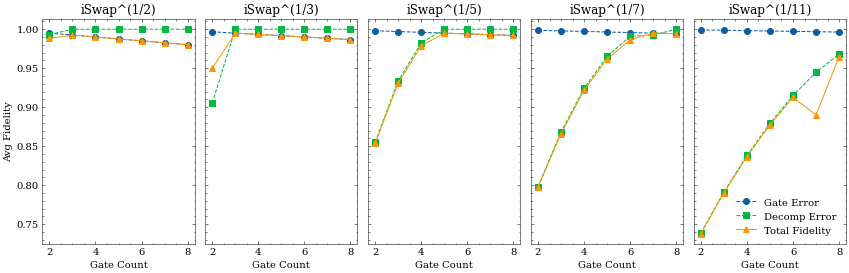

In [3]:
import h5py
with h5py.File('data.h5', 'r') as h5f:
    gate_error = h5f['random2q_gate_error'][:]
    decomp_error = h5f['random2q_decomp_error'][:]
    fidelity_error = h5f['random2q_fidelity_error'][:]

import matplotlib.pyplot as plt
plt.style.use(['science', 'no-latex'])
fig, axs = plt.subplots(1,len(gate_error[0]), sharey=True, figsize=(12, 4))
for alpha in range(len(gate_error[0])):
    axs[alpha].plot(gate_range, np.average(gate_error, axis=0)[alpha], label="Gate Error", linestyle='--', marker='o')
    axs[alpha].plot(gate_range, np.average(decomp_error, axis=0)[alpha], label="Decomp Error", linestyle='--', marker='s')
    axs[alpha].plot(gate_range, np.average(fidelity_error, axis=0)[alpha], label="Total Fidelity", marker='^')
    axs[alpha].set_xlabel("Gate Count")
    axs[alpha].set_title(f"iSwap^(1/{alpha_range[alpha]})")
axs[-1].legend()
axs[0].set_ylabel("Avg Fidelity")
fig.tight_layout()
fig.show()
filename = "nuop_experiment"
fig.savefig('{}.pdf'.format(filename), format="pdf", facecolor='white')

Text(0.5, 1.0, 'RISWAP count for NuOp Random 2Q Unitary')

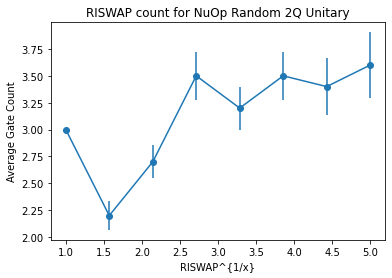

In [60]:
import matplotlib.pyplot as plt
from scipy.stats import sem

plt.errorbar(alpha_range, data.mean(axis=1), yerr=sem(data, axis=1), fmt='-o')
plt.xlabel("RISWAP^{1/x}")
plt.ylabel("Average Gate Count")
plt.title("RISWAP count for NuOp Random 2Q Unitary")

iswap duration * avg gate count = avg total duration

iswap^{1/5}
.2 * 3.75 = .75

iswap^{1/2}
.5 * 2.5 = 1.25

In [24]:
data.mean(axis=1)

array([3. , 2.5, 3.4, 3.6, 3.8])

## Decomposition example with a single two-qubit gate 

In [38]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
# fid_2q = {(0,1):[1]}
fid_2q = dict.fromkeys([(i,j) for i,j in product(range(qc.num_qubits), repeat=2) if i!=j], [1])
params = [[1/2]]
gate_labels = ['$iSwap^{1/2}$']
gate_defs = [iswap]
pgrp = ParallelGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0.000001)
# pm = PassManager([pgrp, re])
pm = PassManager([pgrp])
circ_trans = pm.run(qc)
# print(re.property_set)
circ_trans.draw(output='mpl')

In [2]:
# CNOT gate in the circuit
my_op = np.matrix([[1,0,0,0],
                   [0,1,0,0],
                   [0,0,0,1],
                   [0,0,1,0]])

In [3]:
test_circuit = QuantumCircuit(2)
test_circuit.unitary(my_op, [0,1])

In [4]:
test_circuit = QuantumCircuit(2)
test_circuit.cx(0,1)

In [6]:
# Assume the HW supports the Google SYC gate. This is an underlying fsim_gate. 
# So we pass the fsim_gate function in the gate_defs,
# we pass the desired SYC parameters (theta=pi/2, phi=pi/6) in the params, we pass a label for circuit drawing, 
# and we pass the calibration fidelity of this gate on qubits 0 and 1

# fid_2q = {(0,1): [0.995]} 
fid_2q = {(0,1):[1]}
# params = [[np.pi/2, np.pi/6]]
params = [[1/2]]
gate_labels = ['$iSwap^{1/2}$']
# gate_defs = [fsim_gate]
gate_defs = [iswap]

# All these inputs get passed to the gate decomposition pass. 
# Ignore the [1 to 54] loop (that was from our assumption of Sycamore hardware, but I believe it no longer plays a role)
# tolerance defines the fidelity accuracy we want from the decomposition. If you set the tol=0.1 or so, you can see that 
# lesser two-qubit gates are used.

pgrp = ParallelGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0)
approx_cz = pgrp.run(test_circuit)

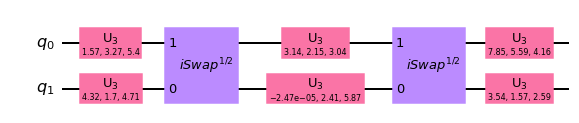

In [7]:
approx_cz.draw(output='mpl')

## Decomposition example with two circuit gates with two hardware gates

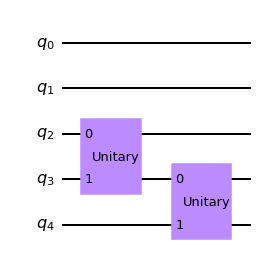

In [8]:
test_circuit = QuantumCircuit(5)
test_circuit.unitary(my_op, [2,3])
test_circuit.unitary(my_op, [3,4])
test_circuit.draw(output='mpl')

In [11]:
# fid_2q = {(2,3): [0.94, #CZ fidelity
#                   0.99],#XY fidelity
#           (3,4): [0.93, #CZ
#                   0.96]}#XY
# params = [[np.pi], 
#           [np.pi]]
# gate_labels = ['CZ', 
#                'XY']
# gate_defs = [cphase_gate, 
#              xy_gate]
# pgrp = ParallelGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0.00000001)
# approx = pgrp.run(test_circuit)

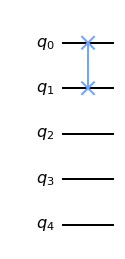

In [28]:
test_circuit = QuantumCircuit(5)
test_circuit.swap(0,1)
test_circuit.draw(output='mpl')

In [37]:
fid_2q = {(2,3): [1, 1],
          (3,4): [1,1],
          (0,4): [1,1],
          (0,1): [1,1]}
params = [[1/2], 
          [1/2]]
gate_labels = ['iSwap^1/2$', 
               'iSwap^1/2$']
gate_defs = [iswap, 
             iswap]
pgrp = ParallelGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0.0)
approx = pgrp.run(test_circuit)

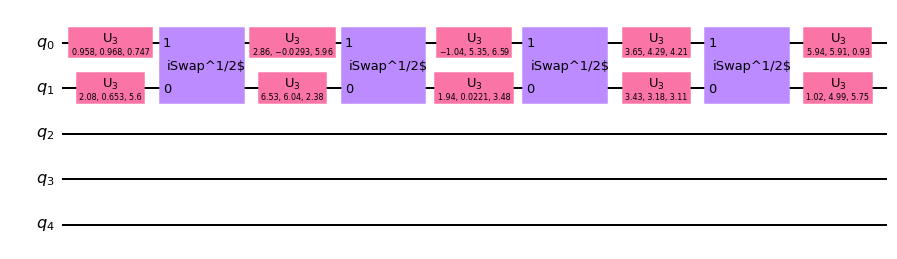

In [38]:
approx.draw(output='mpl')

In [39]:
fid_2q = {(2,3): [1, 1],
          (3,4): [1,1],
          (0,4): [1,1],
          (0,1): [1,1]}
params = [[1], 
          [1]]
gate_labels = ['iSwap^1$', 
               'iSwap^1$']
gate_defs = [iswap, 
             iswap]
pgrp = ParallelGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0.0)
approx = pgrp.run(test_circuit)

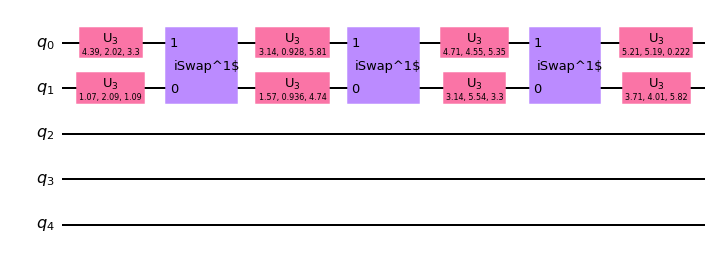

In [41]:
approx.draw(output='mpl')

## Multi-qubit unitary example

In [118]:
# from parallel_multi_qubit_gate_decomposition import *

In [119]:
# test_circuit = QuantumCircuit(4)
# my_op = np.kron(fsim_gate(np.pi/2, np.pi/6), fsim_gate(np.pi/3, np.pi/6)) #creating a test unitary by multiplying two fsim gates
# test_circuit.unitary(my_op, [0,1,2,3])

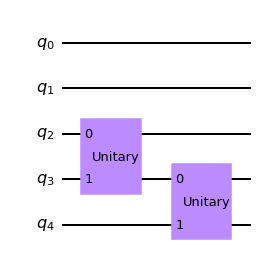

In [120]:
test_circuit.draw(output='mpl')

In [121]:
# fid_2q = {(0,1): [0.99, 0.99],
#           (1,2): [0.99, 0.99],
#           (2,3): [0.94, #CZ fidelity
#                   0.99],#XY fidelity
#           (3,4): [0.93, #CZ
#                   0.96]}#XY
# params = [[np.pi], 
#           [np.pi]]
# gate_labels = ['CZ', 
#                'XY']
# gate_defs = [cphase_gate, 
#              xy_gate]
# pgrp = MultiQubitGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0.0001)
# approx = pgrp.run(test_circuit)

In [122]:
# approx.draw()